In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd


In [2]:
data_dir = './buffon_needle_data_needle_scale'

In [6]:
df = pd.DataFrame(columns=['needle_scale', 'pi'])
for file in os.listdir(data_dir):
    df_read = pd.read_csv(os.path.join(data_dir, file))
    df = pd.concat([df, df_read[['needle_scale', 'pi']]], ignore_index=True)

In [19]:
df.groupby('needle_scale').agg({'pi':['mean', 'std']})

pi          
                  mean       std
needle_scale                    
0.1           3.155442  0.131952
0.2           3.126707  0.080169
0.3           3.148386  0.064476
0.4           3.140738  0.059144
0.5           3.150044  0.044331
0.6           3.135077  0.040036
0.7           3.144724  0.033677
0.8           3.138198  0.031598
0.9           3.148172  0.031545
1.0           3.142382  0.023833

In [18]:
df.groupby['needle_scale']

TypeError: 'method' object is not subscriptable

In [17]:
df

,needle_scale,pi
0,0.8,3.095975
1,0.8,3.119516
2,0.8,3.171457
3,0.8,3.212851
4,0.8,3.167063
...,...,...
987,0.6,3.119314
988,0.6,3.169572
989,0.6,3.115265
990,0.6,3.209414


<Axes: title={'center': 'pi'}, xlabel='needle_scale'>

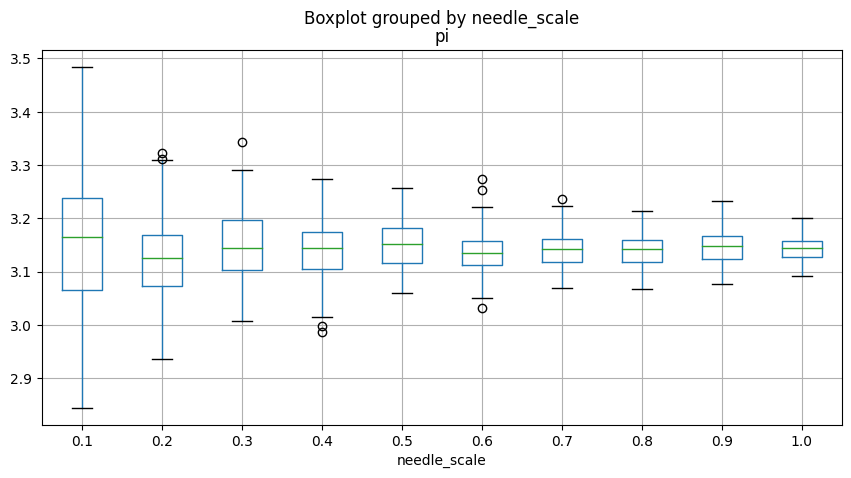

In [8]:
df.boxplot(column='pi', by='needle_scale', figsize=(10, 5))

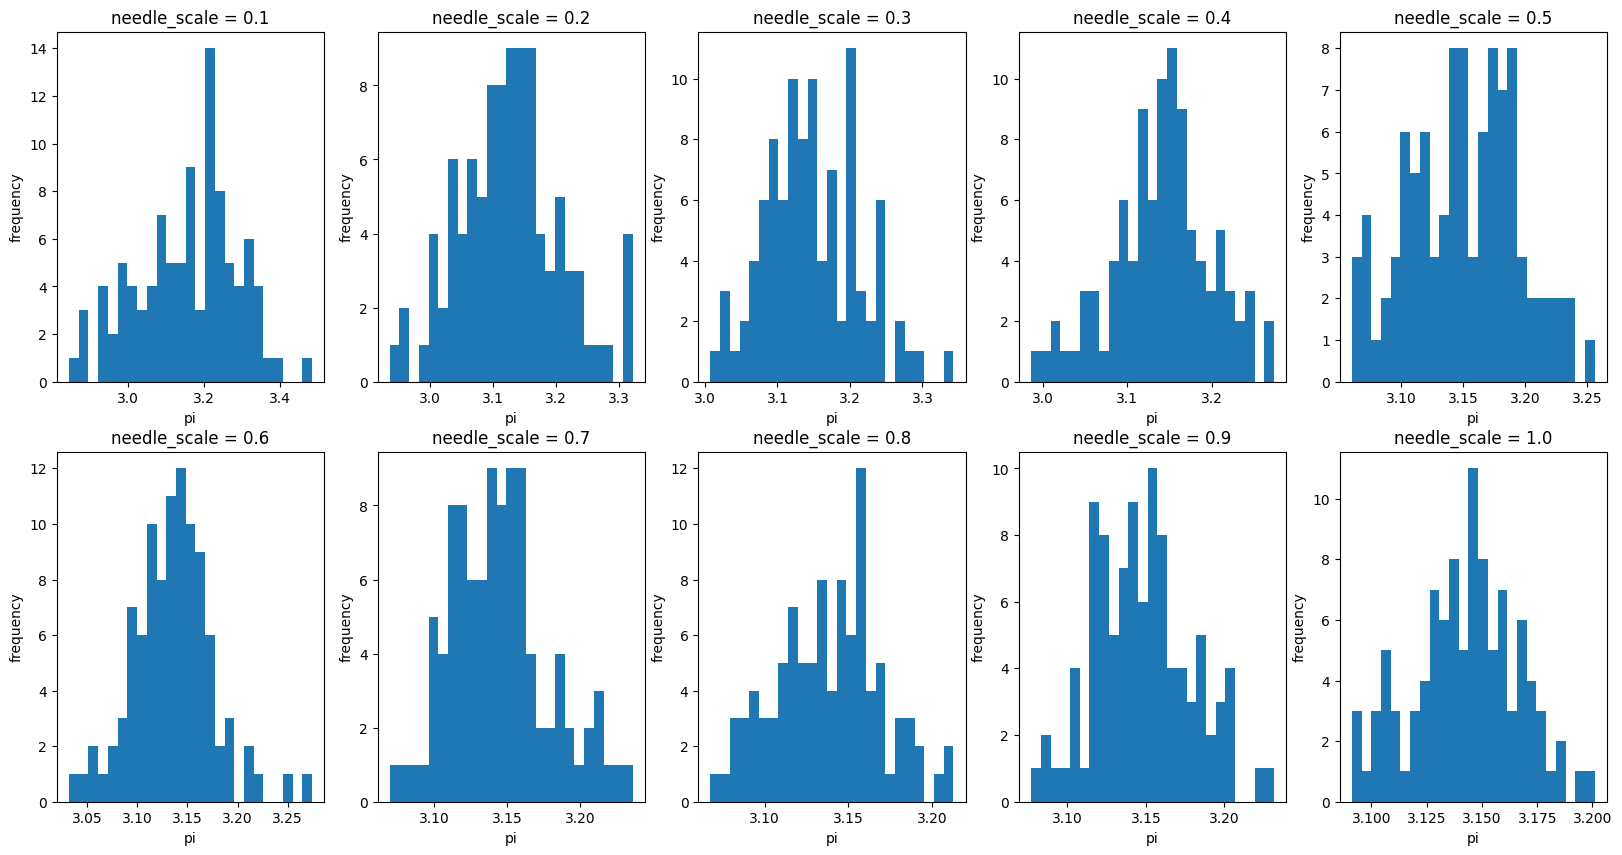

In [13]:
#plot histogram of different number of drops in the subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    needle_scale = round(0.1*(i+1), 1)
    ax.hist(df[df['needle_scale'] == needle_scale]['pi'], bins=25)
    ax.set_title('needle_scale = {}'.format(needle_scale))
    ax.set_xlabel('pi')
    ax.set_ylabel('frequency')